In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
import gensim
import pickle

word2vect = gensim.models.Word2Vec.load('mymodel_tagged')   
word2vect.wv.most_similar('bitcoin',topn=10)


/Users/mcassettix/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bch', 0.6757756471633911),
 ('cash', 0.6581602096557617),
 ('btc', 0.6124559044837952),
 ('p2p', 0.5660016536712646),
 ('gold', 0.5534886717796326),
 ('tippr', 0.5416744351387024),
 ('jar', 0.5347222089767456),
 ('litecoin', 0.529897928237915),
 ('eth', 0.5235786437988281),
 ('ticker', 0.521369457244873)]

In [59]:
word2vect.wv.most_similar('shiba',topn=10)

/Users/mcassettix/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('pup', 0.9081824421882629),
 ('grammatical', 0.8971842527389526),
 ('douchebaggery', 0.8935772180557251),
 ('accidents', 0.893227756023407),
 ('skywalkin', 0.8900096416473389),
 ('wrightwhich', 0.8891437649726868),
 ('chainlinkchain', 0.8887053728103638),
 ('misinform', 0.8879247903823853),
 ('crusty', 0.8871973752975464),
 ('horrific', 0.8840183615684509)]

In [60]:
word2vect.wv.most_similar('doge',topn=10)

/Users/mcassettix/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dough', 0.6747474074363708),
 ('shibe', 0.6140658259391785),
 ('tomcarbon', 0.6010017991065979),
 ('dogecoin', 0.6006119251251221),
 ('250', 0.5941321849822998),
 ('verifyi', 0.5847191214561462),
 ('dogei', 0.584345817565918),
 ('tipped', 0.5786669254302979),
 ('ltc', 0.5786164402961731),
 ('bucks', 0.5710326433181763)]

In [135]:
X = word2vect[word2vect.wv.vocab]

/Users/mcassettix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [199]:
import random
seeds = ['bitcoin','ethereum','litecoin','satoshi','charlie','ripple','stellar','zcash','doge','lambos','moon','ltc','btc','when','hodl','why']
index = random.sample(range(len(X)), 1000-len(seeds))

for seed in seeds:
     if word2vect.wv.vocab[seed].index not in index:
        index.append(word2vect.wv.vocab[seed].index) #add index to list

Xrand = X[index,:]
print(Xrand.shape)
print(len(X),len(Xrand))

(1000, 100)
28668 1000


In [200]:
from  sklearn.cluster  import KMeans
from sklearn.metrics import silhouette_score

SSEs = []
Sil_coefs = []
for k in range(2,15):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Xrand)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(Xrand, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

/Users/mcassettix/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


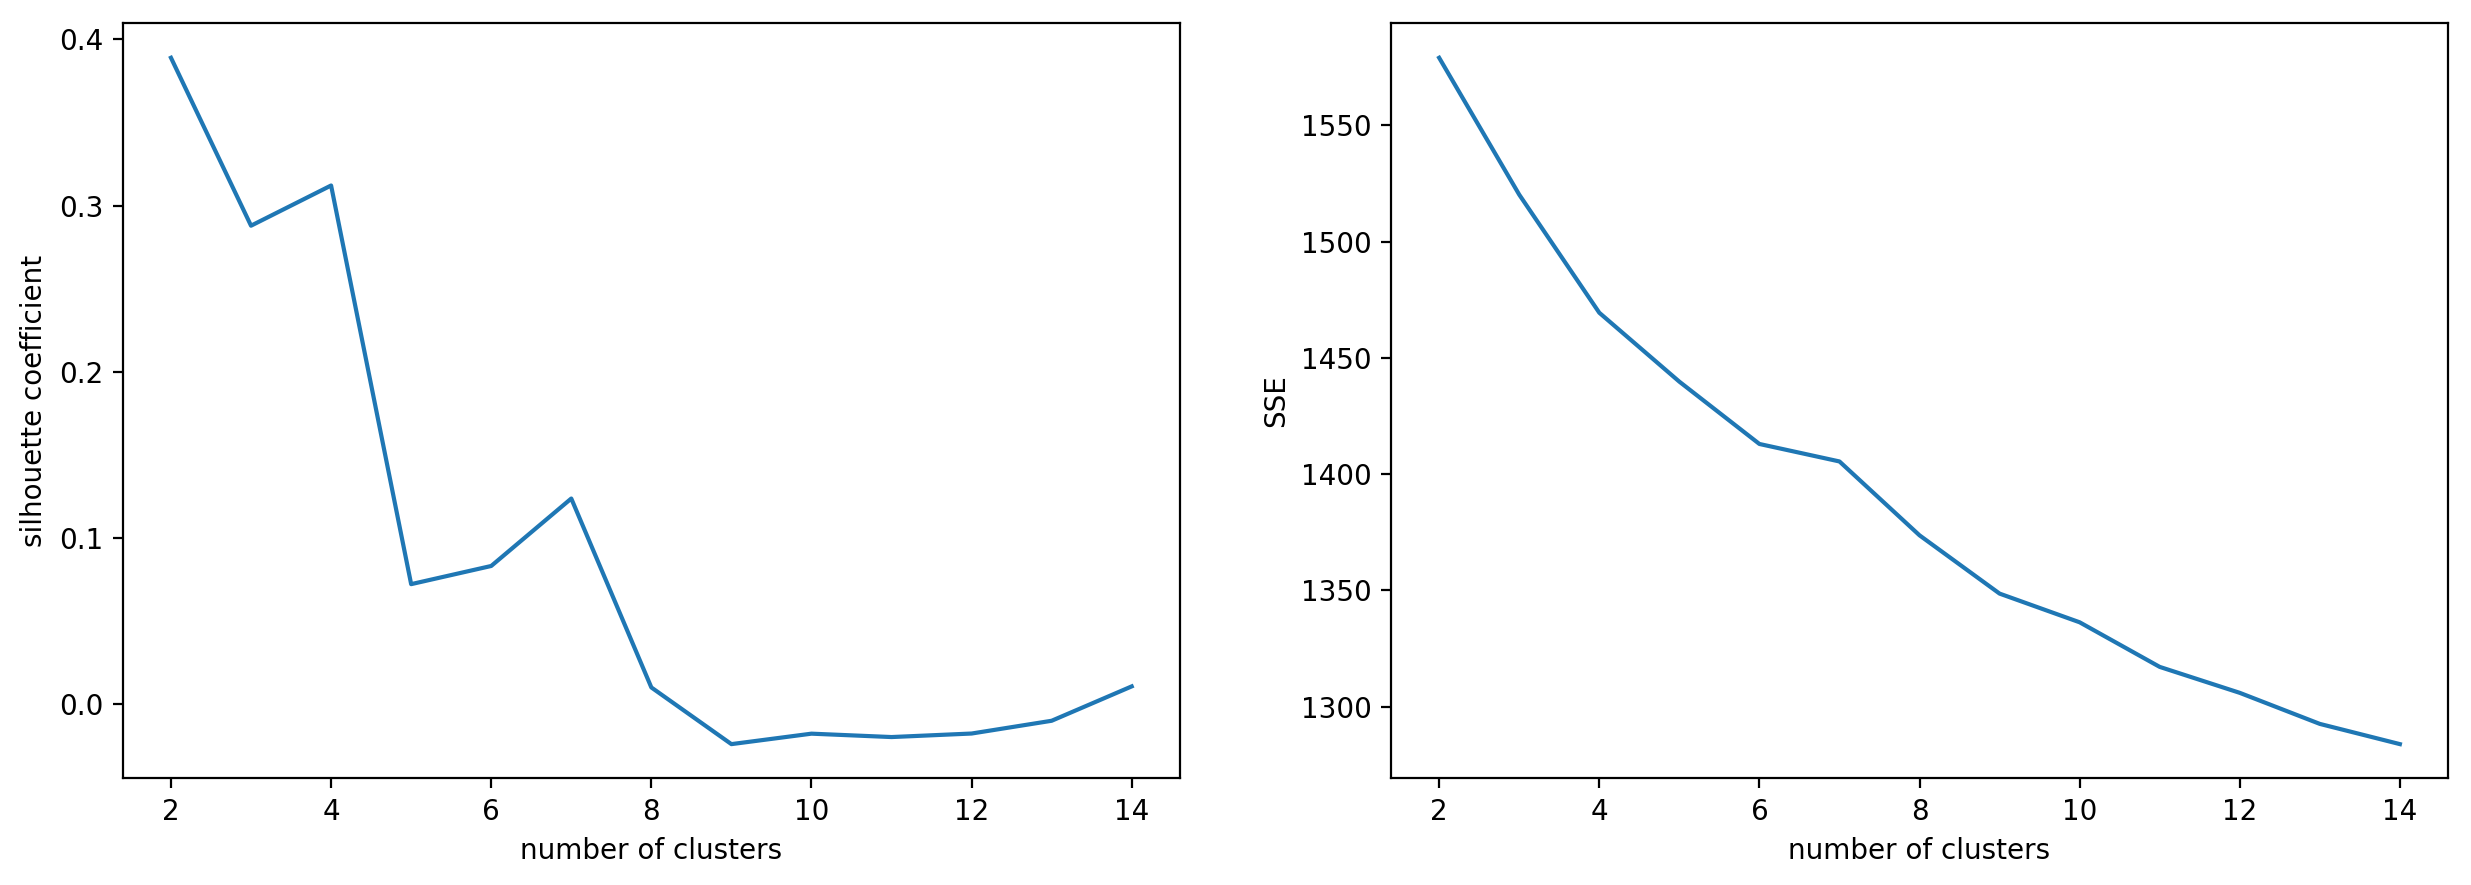

In [201]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,15)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [210]:
%time
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=9 #try 9
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.3 µs


In [211]:
%time
assigned_clusters = kclusterer.cluster(Xrand, assign_clusters=True)
print(assigned_clusters)

CPU times: user 11 µs, sys: 6 µs, total: 17 µs
Wall time: 52 µs
[2, 2, 4, 1, 1, 4, 2, 1, 1, 1, 2, 4, 5, 1, 1, 4, 4, 2, 2, 6, 4, 7, 8, 1, 1, 3, 2, 4, 0, 1, 1, 8, 2, 4, 4, 2, 2, 4, 4, 1, 3, 2, 1, 4, 4, 0, 5, 6, 7, 2, 2, 5, 5, 1, 2, 4, 2, 1, 3, 2, 2, 4, 3, 1, 2, 3, 3, 6, 3, 2, 2, 8, 2, 1, 1, 2, 6, 4, 1, 1, 4, 1, 3, 1, 4, 3, 6, 3, 1, 1, 2, 4, 1, 4, 1, 2, 2, 2, 4, 1, 6, 1, 4, 1, 4, 4, 4, 3, 2, 3, 4, 1, 2, 0, 1, 4, 4, 1, 4, 2, 2, 1, 2, 4, 2, 2, 1, 1, 0, 6, 6, 5, 8, 1, 5, 1, 2, 5, 2, 3, 4, 1, 4, 2, 1, 2, 8, 1, 1, 3, 2, 3, 3, 4, 1, 1, 2, 2, 8, 4, 3, 1, 6, 8, 8, 4, 2, 2, 2, 2, 6, 2, 2, 3, 4, 4, 2, 4, 1, 4, 4, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 8, 2, 4, 4, 1, 0, 4, 0, 2, 1, 1, 2, 3, 2, 3, 0, 0, 0, 2, 1, 2, 7, 3, 4, 8, 2, 3, 4, 4, 1, 2, 0, 0, 2, 1, 3, 2, 1, 4, 8, 6, 1, 1, 2, 0, 5, 4, 7, 2, 3, 1, 2, 0, 8, 1, 4, 2, 2, 4, 7, 7, 1, 3, 6, 3, 2, 8, 5, 4, 1, 1, 5, 1, 4, 3, 1, 2, 7, 3, 4, 1, 2, 3, 5, 2, 4, 3, 2, 4, 4, 3, 0, 7, 1, 1, 3, 5, 7, 2, 2, 2, 4, 3, 2, 4, 2, 3, 2, 5, 1, 2, 8, 2, 2, 2, 3, 1, 2, 0, 2,

In [218]:
km = KMeans(n_clusters=9, random_state=1)
km.fit(Xrand)
labels = km.labels_

In [311]:
from sklearn.neighbors  import NearestNeighbors
centroids = km.cluster_centers_
nn = NearestNeighbors(n_neighbors=2)
nn.fit(Xrand)
closest_to_center=nn.kneighbors(centroids)[1].reshape(-1,)

In [312]:
closest_to_center

array([853,  38, 970, 852, 576, 839, 805, 388,  67, 918, 144, 556,  52,
       392, 693,  71, 195, 556])

In [313]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE    

tsne = TSNE(n_components=2, random_state=0,perplexity=100)
np.set_printoptions(suppress=True)
X_new = tsne.fit_transform(Xrand)

In [314]:
best_words = [word2vect.wv.index2word[i] for i in closest_to_center]
best_words

['hate',
 'so',
 'type',
 'moment',
 'technology',
 'note',
 'similar',
 'cryptocurrency',
 'automatically',
 'test',
 'does',
 'under',
 'no',
 'ago',
 'nano',
 'out',
 'better',
 'under']

In [315]:
bestindex = [0,2,4,5,7,12,14,16,17]
better_words = [best_words[idx] for idx in bestindex]
print(better_words)
words_closest = closest_to_center[bestindex]

['hate', 'type', 'technology', 'note', 'cryptocurrency', 'no', 'nano', 'better', 'under']


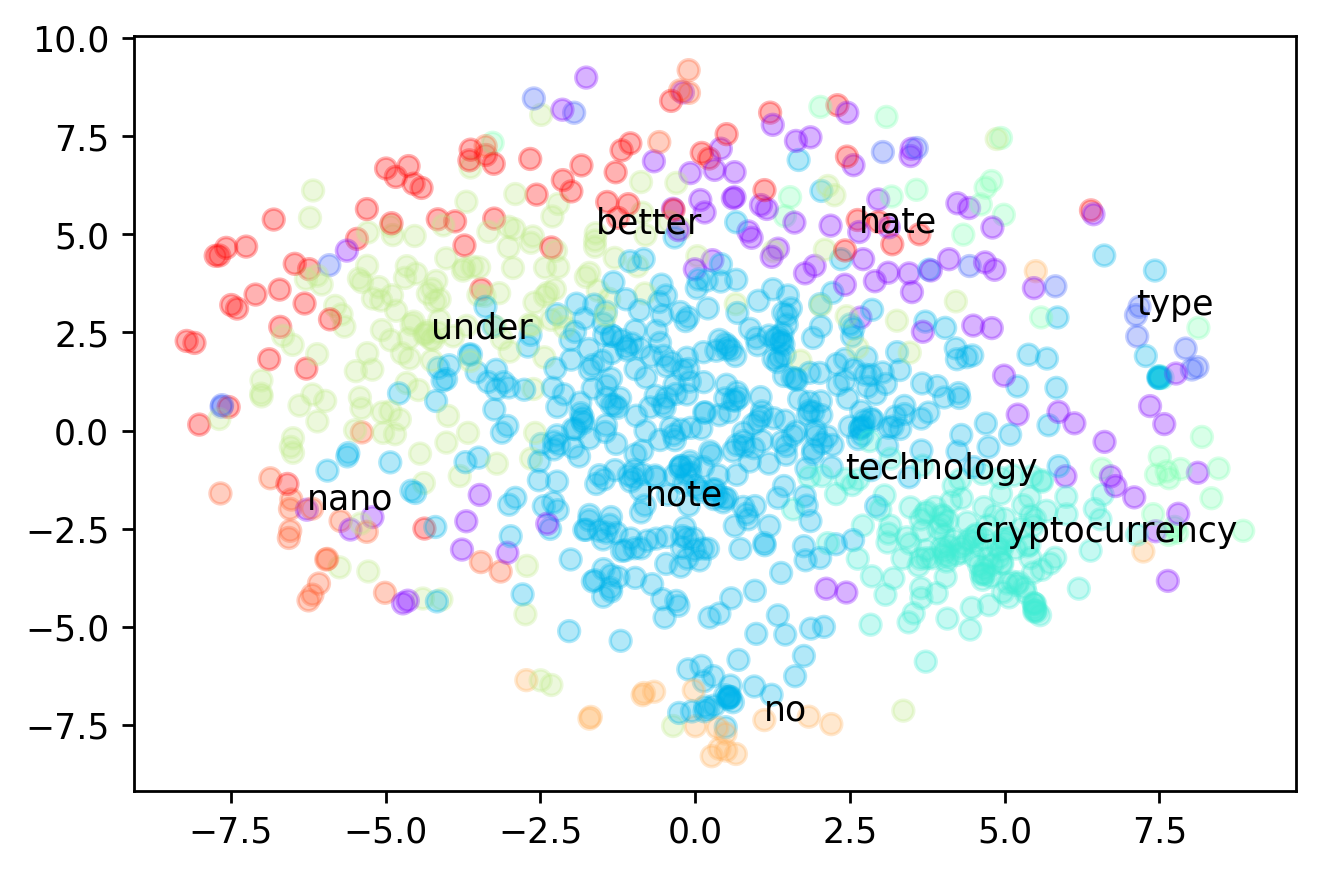

In [316]:
plt.figure(dpi=250)
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels, cmap=plt.cm.rainbow, alpha=0.3)
for label, x, y in zip(better_words, X_new[words_closest, 0], X_new[words_closest, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [317]:
plt.savefig("tsne_topics_.png",dpi=250)

<Figure size 432x288 with 0 Axes>